<div id="items-section">
    <div class="items-row">
        <div class="item">
            <img>
            </img>
            <div class="metadata">
                <span class="title">
                    14U380-EU1TK
                </span>
                <span class="price">
                    최저 389,000원
                </span>
                <span class="comments">
                    상품평 599
                </span>
            </div>
        </div>
    </div>
    <div class="items-row">
        ...
    </div>
</div>


위 쇼핑몰의 HTML 구조를 분석하고, 다음에서 요구하는 요소의 단일 선택자 혹은 선택자 경로를 찾아보세요. 

1. 품명에 해당하는 html 요소 

> div#metadata span.title

> 모범 답안은 span.title

2. 물품 이미지에 대한 html 요소

> div#item img

> 모범 답안은 전체에 img 가 하나 뿐이니 img 로 충분합니다

3. 물품 정보 html 요소의 자식들 중 상품평에 해당하는 html 요소 

> div#metadata span.comments

> .item > .comments 나 div.metadata> span.comments와 같이 태그명을 써주는 것도 좋습니다. 

4. 전체 물품 리스트 html요소의 자손들 중 품명, 가격, 상품평 등의 데이터를 가진 html 요소들 

> div# metadata

> #items-section span 

그냥 span으로 해도 같은 결과가 나오지만 문ㅁ제에 굳이 전체 물품 리스트의 자손 이라고 적었으니 지켜줍시다~!

# stage-3 개발자 도구로 페이지를 분석해 보자
___ 

우리는 네이버 tv top100 페이지에서 각 클립의 제목 채널명, 조회수, 좋아요 수를 수집하게 됩니다. 

여러 리스트를 수집할 때는 리스트 항목 중 하나를 정해 선택자 경로를 만든 후, 이것을 일반화시켜 다른 모든 리스트를 수집할 수 있는지 검증하는 절차를 거치게 됩니다. 

div.header, div.aside, div.container로 구성되어 있는 것이 보입니다. script 태그는 html 요소가 아니므로 무시하셔도 좋으며 나머지는 각각 div#header, div# aside, div#container, div.folating_top입니다. div에 다시 마우스를 대보면  div#wrap 구조를 더 잘 파악할 수 있습니다.

div.top 100이라는 자식 요소 안에 div.cate_tit2, div.top_main, div.content가 있습니다. 

추후 100개의 클립을 모두 수집하려면 둘을 나누어 처리해야겠습니다. 지금은 자료가 더 많은 div#content로 들어가 봅시다. 

content에서 계속 안으로 들어가다 보면 그 안에 수 많은 div.cds가 들어있고 그 안의 div는 각각 클립을 포함하고 있다는 것을 알 수 있습니다. 

이렇게 리스트의 각 요소까지 접근했다면 성공적으로 수집할 수 있다고 보시면 됩니다. 남은 것은 이 요소를 더 파고들어 원하는 정보만을 뽑ㅇ아내는 것입니다. 

div#wrap>div#container>div.top100?div#content>div.top100_mv>div.wrp_cds>div.cds_area>div.cds 이렇게 위에서부터 찾아 내려오면 페이지의 전반적인 구조를 파악할 수 있게 되지만 찾는 속도는 다소 느리게 됩니다.

적절한 부분까지 찾아서 올라갑니다. 그러고 나면 div.cds를 선택자로 사용해야겠다는 생각이 듭니다.

# stage-4 완벽한 선택자 경로를 만들자
___

스테이지 4에서는 실제 사용되는 선택자 경로의 조건에 대해 알아봅니다. 스테이지 3에서 선택자 경로를 찾는 방법을 간단히 알아보았지만 선택자의 성질에 따른 정확한 규칙을 지키지 않으면 의도치 않은 결과가 나오기 쉽습니다. 

상황에 맞게 항상 고려해야하는 선택자 경로의세가지 조건에 대해 배우겠습니다 .

____ 

## 1. 간결성 

선택자 경로는 간결한 것이 좋습니다. 전체 내용을 감싸는 태그부터 출발하는 기나긴 경로를 사용한다고 해서 나아지는 점은 하나도 없으니까요. 오히려 선택자를 하나하나 찾아가는 데에 걸리는 시간이 낭비됩니다. 

div#wrap>div#container>div.top100?div#content>div.top100_mv>div.wrp_cds>div.cds_area>div.cds 스테이지 3에서 찾았던 클립 정보 하나의 선택자 경로는 위와 같습니다. 하지만 꼭 처음부터 시작하여 정직하게 삽질을 할 필요는 없습니다. 이 선택자 경로 상에서 가장 중요한 선택자는 우리가 원하는 데이터가 있는 마지막 선택자 입니다! 

> ###  div.cds

## 2. 정확성 

짧은 선택자 경로는 좋지만, 생략은 필연적으로 불확실성을 야기합니다. 앞의 모든 데이터 내용을 지운다면 우리가 원하는 값을 얻을 수 있을까요? 

그것은 모를일입니다. 클래스는 고유성이 없기 떄문에 어떤 데이터를 찾는지에 대해 확신을 할 수 없습니다. 

ctrl+f 를 눌러 검색창을 열고 선택자인 span.hit를 적어 검색해 보고 다른 클래스에서 같은 내용을 쓴 것이 있는지 확인을 해봐야 합니다! 클립 조회수 이외에 span.hit를 쓴 곳이 없다면 비로소 안심하고 선택자를 사용할 수 있게 될 것입니다. 

### 세분화 

간결성과 정확성을 위해서 span.hit만 쓰는 것은 좋지 않은 습관입니다. 좀 더 정확한 결과를 얻기 위해서 적절히 범위를 한정해주면 훨씬 더 정확한 결과를 얻을 수 있습니다.

1위와 3위가 있는 div# top_main 과 div#content로 서로 다른 조시ㅏㅇ을 가지고 있다는 것을 이용합니다. 


1-3위 조회수 span.meta>span.hit

나머지 조회수 dd.meta>span.hit

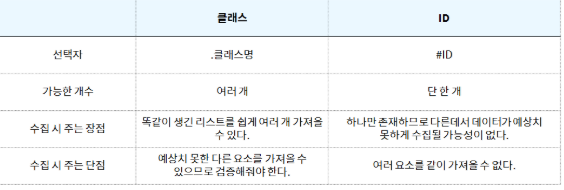

이를 꼭 상황에 맞게 꺼내쓸 수 있도록 숙달시켜야 합니다.

## 3. 응집성 

클립 데이터 수집 시나리오를 다시 살펴 봅시다. 

우리는 먼저 4위~100위 클립에서 제목, 채널명, 조회수, 좋아요 수를 모두 뽑아낼 것입니다. 

제가 찾은 각각의 선택자 경로는 다음과 같습니다. 

제목 
> div.cds tooltip

채널명
> div.cds dd.chn>a

조회수 
> div.cds dd.meta > span.hit

좋아요 수
> div.cds dd.meta >span.hit




div.sction_posts div.area_tag>a
> ul.list_post>li.link_post>div.area_tag>a.tag


td>a.title

In [11]:
# 파이썬 챌린지 

raw_data = '    코알라 웹개발 스터디에 정상적으로 신청이 완료되었습니다.    '


In [12]:
# 문자열 앞뒤의 공백을 지우고 data라는 변수에 집어 넣으십시오 
data=raw_data.strip()
data

'코알라 웹개발 스터디에 정상적으로 신청이 완료되었습니다.'

In [13]:
#1의 결과에서 웹개발을 데이터 수집으로 바꾸어 new_Data라는 변수에 넣으세요
new_data=data.replace("웹개발","데이터 수집")
data

'코알라 웹개발 스터디에 정상적으로 신청이 완료되었습니다.'

In [14]:
# 2의결과로 나온 문자열의 길이를 data_length라는 변수에 넣으세요 
data_length=len(data)


In [15]:
# raw_data,data,new_data,data_length
print(raw_data);print(data);print(new_data);print(data_length)

    코알라 웹개발 스터디에 정상적으로 신청이 완료되었습니다.    
코알라 웹개발 스터디에 정상적으로 신청이 완료되었습니다.
코알라 데이터 수집 스터디에 정상적으로 신청이 완료되었습니다.
31


In [31]:
#challenge 2 
ace_of_teams = ['JUV : Ronaldo', 'CHE : Hazard', 'LIV : Salah', 'MNU : Pogba', 'INT : Icardi', 'BCN : Suarez', 'RMD : Modric']
podium = []

#... 과제 작업

# #아자르 이카르디
for i in ace_of_teams:
    player=i.split(" : ")[1]
    podium.append(player)
podium.sort(reverse=False)
print(podium)

['Hazard', 'Icardi', 'Modric', 'Pogba', 'Ronaldo', 'Salah', 'Suarez']


In [32]:
#과제 2 
shopping_items = [
    ['맥스틸 TRON G10PRO', 22890, '상품평 2,464', '등록일 2018.08.'],
    ['로지텍G G102', 19820, '상품평 15,337', '등록일 2016.10.'],
    ['몬스타기어 데빌스킬', 35000, '상품평 1,200', '등록일 2018.05.'],
    ['맥스틸 TRON G10', 19800, '상품평 16,788', '등록일 2014.11.'],
    ['로지텍 B100', 10690, '상품평 4,016', '등록일 2017.01.'],
    ['앱코 WM300', 5490, '상품평 826', '등록일 2018.05.'],
    ['앱코 HACKER A660', 29790, '상품평 1,834', '등록일 2017.08.'],
    ['HP M100', 4390, '상품평 3,852', '등록일 2017.09.'],
    ['로지텍 G G402', 35300, '상품평 4,005', '등록일 2014.09.'],
    ['제닉스 M1', 11880, '상품평 7,222', '등록일 2013.05.']]

In [39]:
shopping_items[0][3].find("08")

9

In [35]:

#먼저 총액을 계산할 변수를 준비하고 모든 상품의 가격을 더해주세요 
def total_price(lst):
    sum_tot=0
    for i in lst:
        sum_tot+=i[1]
    return sum_tot 
total=total_price(shopping_items)
print(total)

195050


In [40]:
# 가격을 더하면서 모든 상품의 정보를 다음 포멧으로 바꾸어 출력하세요 
def print_form(lst):
    total=0
    for i in lst:
        total+=i[1]
        print("{} 제품은 {}년 {}월에 등록되었습니다".format(i[0],i[3][6:8],i[3][9:11]))
print_form(shopping_items)

맥스틸 TRON G10PRO 제품은 18년 08월에 등록되었습니다
로지텍G G102 제품은 16년 10월에 등록되었습니다
몬스타기어 데빌스킬 제품은 18년 05월에 등록되었습니다
맥스틸 TRON G10 제품은 14년 11월에 등록되었습니다
로지텍 B100 제품은 17년 01월에 등록되었습니다
앱코 WM300 제품은 18년 05월에 등록되었습니다
앱코 HACKER A660 제품은 17년 08월에 등록되었습니다
HP M100 제품은 17년 09월에 등록되었습니다
로지텍 G G402 제품은 14년 09월에 등록되었습니다
제닉스 M1 제품은 13년 05월에 등록되었습니다


In [46]:
a= total_price(shopping_items)
print(len(shopping_items))
print("평균 가격은 ",a/len(shopping_items))

10
평균 가격은  19505.0


## 데이터 수집해보기 

In [47]:
import requests 
from bs4 import BeautifulSoup

### 소스 코드를 살아있는 HTML로 만들기


In [48]:
req=requests.get('https://tv.naver.com/r/')
raw=req.text
html=BeautifulSoup(raw,"html.parser")
html


<!DOCTYPE html>

<html lang="ko">
<head>
<title id="headTitle">
    	
    		
    		
    		인기영상
    	
    </title>
<meta charset="utf-8"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="noindex" name="robots"/>
<meta content="summary" name="twitter:card"/>
<meta content="100012287952710" property="fb:admins">
<meta content="232491033870086" property="fb:app_id">
<meta content="https://tv.naver.com/r/" property="og:url"/>
<meta content="Top100 : 네이버TV" property="og:title"/>
<meta content="동영상을 감상하는 가장 쉽고 빠른 방법" property="og:description"/>
<meta content="website" property="og:type"/>
<meta content="https://ssl.pstatic.net/img.tvcast/common/img/og/180629/OG_Tag_270_270.png" property="og:image"/>
<link href="/resources/release/css/tvcast_20200330142449.css" rel="stylesheet" type="text/css"/>
<link href="/resources/release/css/contest_202003301

### html 문서에서 필요한 요소만 선택하기 


In [49]:
infos=html.select("div.cds")
infos

[<div class="cds">
 <div class="cds_type">
 <a class="cds_thm" data-anisrc="https://phinf.pstatic.net/tvcast/20200330_165/d0yWf_1585576688120qyob7_GIF/20240639-7285-11ea-ac55-b496915d8e58.gif?type=mfullfill_234_132_ani_limit15" href="https://tv.naver.com/v/13123312/list/67096" onclick="clickcr(this, 'top.clip', '', '4', event)">
 <span class="mask _top_ani_area"></span>
 <img alt="＂실수 아니야＂ 서강준의 입맞춤에 사르르 녹는 박민영♡" data-src="https://phinf.pstatic.net/tvcast/20200330_61/HTe34_1585572710031jKnR4_JPEG/20200330_214244_780_1.jpg?type=f194_109_blend" onerror='this.src="https://phinf.pstatic.net/tvcast/20161227_263/photoinfra_1482831787654EeESz_PNG/default_clip.png?type=f194_109"' src="https://phinf.pstatic.net/tvcast/20200330_61/HTe34_1585572710031jKnR4_JPEG/20200330_214244_780_1.jpg?type=f194_109_blend" width="100%"/>
 <img alt="임시 이미지" class="_ani_img" src="https://ssl.pstatic.net/img.tvcast/pc/img/bg_blank.png" style="position:absolute; left:0px; top:0px; opacity:0" width="100%"/>
 <!-- [D]담

In [50]:
print(infos[0])

<div class="cds">
<div class="cds_type">
<a class="cds_thm" data-anisrc="https://phinf.pstatic.net/tvcast/20200330_165/d0yWf_1585576688120qyob7_GIF/20240639-7285-11ea-ac55-b496915d8e58.gif?type=mfullfill_234_132_ani_limit15" href="https://tv.naver.com/v/13123312/list/67096" onclick="clickcr(this, 'top.clip', '', '4', event)">
<span class="mask _top_ani_area"></span>
<img alt="＂실수 아니야＂ 서강준의 입맞춤에 사르르 녹는 박민영♡" data-src="https://phinf.pstatic.net/tvcast/20200330_61/HTe34_1585572710031jKnR4_JPEG/20200330_214244_780_1.jpg?type=f194_109_blend" onerror='this.src="https://phinf.pstatic.net/tvcast/20161227_263/photoinfra_1482831787654EeESz_PNG/default_clip.png?type=f194_109"' src="https://phinf.pstatic.net/tvcast/20200330_61/HTe34_1585572710031jKnR4_JPEG/20200330_214244_780_1.jpg?type=f194_109_blend" width="100%"/>
<img alt="임시 이미지" class="_ani_img" src="https://ssl.pstatic.net/img.tvcast/pc/img/bg_blank.png" style="position:absolute; left:0px; top:0px; opacity:0" width="100%"/>
<!-- [D]담았을때 cla

In [55]:
clip1= infos[0]
clip1_title=clip1.select_one('dt.title tooltip')
print(clip1_title)

<tooltip>＂실수 아니야＂ 서강준의 입맞춤에 사르르 녹는 박민영♡</tooltip>


In [57]:
print(clip1.select_one('dd.chn > a ').text)
print(clip1.select_one("span.hit").text)
print(clip1.select_one("span.like").text)

날씨가 좋으면 찾아가겠어요
재생 수164,762
좋아요 수2,596


In [59]:
for clip1 in infos:
    print(clip1.select_one('dt.title tooltip').text)
    print(clip1.select_one('dd.chn > a ').text)
    print(clip1.select_one("span.hit").text)
    print(clip1.select_one("span.like").text)
    print()

＂실수 아니야＂ 서강준의 입맞춤에 사르르 녹는 박민영♡
날씨가 좋으면 찾아가겠어요
재생 수164,762
좋아요 수2,596

T1 vs HLE 3세트
리그 오브 레전드 네이버스포츠
재생 수75,209
좋아요 수128

[사전 선호도 조사] 더보이즈(THE BOYZ) 퍼포먼스 미리보기
로드 투 킹덤
재생 수21,145
좋아요 수1,834

'여자 입주자 편' 설레는 첫 만남..♥ 박지현 X 이가흔 X 서민재
하트시그널 시즌3
재생 수38,922
좋아요 수53

[단독] "가족 지키려면 유시민 비위 내놔라"…공포의 취재
MBC뉴스
재생 수25,983
좋아요 수68

"20만 명 숨질 수도"…美 곳곳 삼엄한 '통금령'
MBC뉴스
재생 수8,974
좋아요 수8

모든 입국자 "2주간 집에"…가족들은 호텔로
MBC뉴스
재생 수9,134
좋아요 수13

또 미뤄 4월 9일부터 '온라인 개학'…고3·중3부터 순차 진행
JTBC뉴스
재생 수10,093
좋아요 수7

역대 황당 끝내기 모음
빡무
재생 수34,389
좋아요 수36

강다니엘 -2U (KANG DANIEL -2U)
쇼! 음악중심
재생 수45,073
좋아요 수7,722

[3회 예고] 내가 미치겠는 건, 두 사람을 동시에 사랑한다는 거야…
부부의 세계
재생 수650,870
좋아요 수1,028

이탈리아 확진 10만명 넘어…스페인 공주, 코로나19로 사망
JTBC뉴스
재생 수60,460
좋아요 수14

서울아산병원서 9세 여아 '양성'…입원 전 의정부성모병원 방문
JTBC뉴스
재생 수6,745
좋아요 수13

[영상] 지게차로 옮겨지는 시신…코로나19로 신음하는 미국
SBS뉴스
재생 수25,963
좋아요 수18

아직 확진 아니라고?…검사 중에 식당·카페 '들락'
MBC뉴스
재생 수7,286
좋아요 수10

'주윤발' 의 가왕 방어전 무대 - 거짓말 거짓말 거짓말
복면가왕
재생 수164,602
좋아요 수3,740

미, 비관적 전망…"코로나로 넉 달 내 8만여 명 숨질 수도"
JTBC뉴스
재생 수6,834
좋아요 수

In [81]:
#challenge 1 이제 1위에서 3위 클립의 클립명,채널명, 재생 수 ,조회수를 클릭해봅시다. 
title="dl.cds_info > dt.title strong.tit > span"
channel_title="dd.chn > a "
play_num="dd.meta > span.hit "
view="dd.meta > span.like"


In [63]:
req=requests.get("https://tv.naver.com/r")
raw=req.text
html=BeautifulSoup(raw,"html.parser")
html


<!DOCTYPE html>

<html lang="ko">
<head>
<title id="headTitle">
    	
    		
    		
    		인기영상
    	
    </title>
<meta charset="utf-8"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="noindex" name="robots"/>
<meta content="summary" name="twitter:card"/>
<meta content="100012287952710" property="fb:admins">
<meta content="232491033870086" property="fb:app_id">
<meta content="https://tv.naver.com/r/" property="og:url"/>
<meta content="Top100 : 네이버TV" property="og:title"/>
<meta content="동영상을 감상하는 가장 쉽고 빠른 방법" property="og:description"/>
<meta content="website" property="og:type"/>
<meta content="https://ssl.pstatic.net/img.tvcast/common/img/og/180629/OG_Tag_270_270.png" property="og:image"/>
<link href="/resources/release/css/tvcast_20200330142449.css" rel="stylesheet" type="text/css"/>
<link href="/resources/release/css/contest_202003301

In [74]:
infos=html.select('ul.rolling > li')# 띄어쓰기는 반드시 해 줍시다.

In [75]:
infos

[<li>
 <div class="inner">
 <a class="box" data-anisrc="https://phinf.pstatic.net/tvcast/20200331_105/rmpXw_1585662905681dg6gJ_GIF/852637fc-734a-11ea-80bf-b496915d9eb0.gif?type=mfullfill_406_228_ani_limit15" href="https://tv.naver.com/v/13141091/list/67096" onclick="clickcr(this, 'top.3clip', '', '1', event)">
 <span class="mask _top_ani_area"></span>
 <img alt="껌딱지처럼 붙어있는 박민영♥서강준 (시작부터 꽁냥꽁냥)" data-src="https://phinf.pstatic.net/tvcast/20200331_13/EQuex_1585657608381hE7dk_JPEG/20200331_210644_445_1.jpg?type=f406_228_blend" onerror='this.src="https://phinf.pstatic.net/tvcast/20161227_263/photoinfra_1482831787654EeESz_PNG/default_clip.png?type=f406_228"' src="https://phinf.pstatic.net/tvcast/20200331_13/EQuex_1585657608381hE7dk_JPEG/20200331_210644_445_1.jpg?type=f406_228_blend"/>
 <img alt="임시 이미지" class="_ani_img" src="https://ssl.pstatic.net/img.tvcast/pc/img/bg_blank.png" style="position:absolute; left:0px; top:0px; opacity:0"/>
 <em class="time"><span class="blind">재생시간</span>1:58</

In [82]:
for clip1 in infos:
    print(clip1.select_one(title).text)
    print(clip1.select_one(channel_title).text)
    print(clip1.select_one(play_num).text)
    print(clip1.select_one(view).text)
    print()

껌딱지처럼 붙어있는 박민영♥서강준 (시작부터 꽁냥꽁냥)
날씨가 좋으면 찾아가겠어요
재생 수46,277
좋아요 수647

너구나, 김연두가? [일진에게 찍혔을 때2] EP01
콬TV
재생 수293,030
좋아요 수836

[단독] "가족 지키려면 유시민 비위 내놔라"…공포의 취재
MBC뉴스
재생 수36,625
좋아요 수152



## 네이버 뉴스 수집 시작! 

이번에는 네이버 검색, 그 중에서도 뉴스 검색을 수집해 볼텐데요.

먼저 어떤 키워드로 뉴스를 검색해서 나오는 기사들을 단순히 수집하려고 합니다. 



In [84]:
import requests 
from bs4 import BeautifulSoup

raw=requests.get("https://search.naver.com/search.naver?where=news&query=%EC%95%84%EC%8B%9C%EC%95%88%EA%B2%8C%EC%9E%84",headers={'User-Agent': 'Mozilla/5.0'}).text
html=BeautifulSoup(raw,"html.parser")
# 이제 우리의 요청은 파이어폭스 브라우저 접속 요청과 같습니다. 
html

<!DOCTYPE doctype html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="아시안게임 : 네이버 뉴스검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'아시안게임'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'아시안게임'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>아시안게임 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_200326.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pst

In [ ]:
# 이제 기사 제목의 HTML 위치를 찾습니다.
title="a"

In [93]:
info=html.select("ul.type01 > li")

for article in info:
    title = article.select_one('a._sp_each_title').text
    journal = article.select_one("span._sp_each_source").text

    print(journal, title)

OSEN 포체티노의 공치사, "아시안게임 허락해서 '토트넘의 손흥민' 있다"
뉴시스 印尼, 아시안게임 선수촌 응급병원으로 탈바꿈
풋볼리스트 '썰' 풀어놓은 포체티노 "손흥민, 내가 아시안게임 보내준 거야"
데일리안 도종환, 2030 아시안게임 충청 유치 관련 공약 발표
충청뉴스 "2030아시안게임 충청권 유치 준비 철저 기해야"
뉴스핌 [사진] 중국 아시안게임 건설 현장 '이상무', 항저우 경기장 구축에 속도
연합뉴스 [AsiaNet] OCA - 2020 싼야 아시안 비치게임, 예정대로 진행
포모스 2021 실내 무도 아시안게임, e스포츠 정식 종목 채택
충청일보 아시안게임 충청권 공동유치 공약
연합뉴스TV 동남아시안 게임 퇴장 박항서, 친선 4경기 출장정지


이제 웹페이지를 이동하며 수집을 해봅시다. 

가볍게 3페이지까지만 수집합니다.


In [97]:
for page in range(3):
    raw=requests.get("https://search.naver.com/search.naver?where=news&query=%EC%95%84%EC%8B%9C%EC%95%88%EA%B2%8C%EC%9E%84&start="+str(page*10+1),headers={'User-Agent': 'Mozilla/5.0'}).text
    html=BeautifulSoup(raw,'html.parser')
    articles=html.select("ul.type01 > li")
    for article in articles:
        title = article.select_one('a._sp_each_title').text
        journal = article.select_one("span._sp_each_source").text
        print(journal, title)
    print("{}page 완료".format(page+1))

OSEN 포체티노의 공치사, "아시안게임 허락해서 '토트넘의 손흥민' 있다"
뉴시스 印尼, 아시안게임 선수촌 응급병원으로 탈바꿈
풋볼리스트 '썰' 풀어놓은 포체티노 "손흥민, 내가 아시안게임 보내준 거야"
데일리안 도종환, 2030 아시안게임 충청 유치 관련 공약 발표
충청뉴스 "2030아시안게임 충청권 유치 준비 철저 기해야"
뉴스핌 [사진] 중국 아시안게임 건설 현장 '이상무', 항저우 경기장 구축에 속도
연합뉴스 [AsiaNet] OCA - 2020 싼야 아시안 비치게임, 예정대로 진행
포모스 2021 실내 무도 아시안게임, e스포츠 정식 종목 채택
충청일보 아시안게임 충청권 공동유치 공약
연합뉴스TV 동남아시안 게임 퇴장 박항서, 친선 4경기 출장정지
1page 완료
연합뉴스 [골프소식] 아시안게임 은메달 김영웅, 웍스와 후원계약
아주경제 [NNA] 印尼, 아시안게임 선수촌을 COVID19 환자 병동으로 활용
점프볼 AG 女 3x3 대표팀 김화순 전 감독, "아시안게임 때 경험 살려 보겠다"
YTN 또 '박항서 매직'...베트남, 60년 만에 동남아시안게임 우승
YTN언론사 선정 "日 정부, 9년 전 中 아시안게임때는 욱일기 사용 자제 요구"
KBS 박항서 매직, 베트남 60년 만에 동남아시안게임 우승
뉴스1 2030 충청권 아시안게임 공동유치 '첫발'…용역 착수
조선일보 박항서 또 신화… 60년 만에 동남아시안게임 金
노컷뉴스 민주당, 아시안게임 유치 등 충청권 현안 지원 약속
연합뉴스 최경선, 아시안게임 여자마라톤 3위로 격상…北김혜성 도핑 징계
2page 완료
연합뉴스 체육요원 '병역 특례' 올림픽·아시안게임 최소한 유지 이유는?
동아일보 ‘쌀딩크’ 박항서 매직…베트남, 60년 만에 동남아시안게임 우승
MK스포츠 FC서울, ‘2018 아시안게임 주역’ 김진야 영입 [오피셜]
SBS '박항서 매직' 베트남, 동남아시안게임 결승 진출
한겨레 김학범 “아시안게임 땐 손흥민도 물, 공 들게 했다”
연합뉴스언론사 선정 -아시안게임- 나아름, 사이클 여자 개

In [25]:
#challenge2 
# 해커 뉴스 페이지에서 기사 제목 수집하기 
import requests
from bs4 import BeautifulSoup

for i in range(1,4):
    url="https://news.ycombinator.com/news?p={}".format(i)
    raw=requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
    data=raw.text
    html=BeautifulSoup(data,"html.parser")
    titles=html.select("a.storylink")
    for title in titles:
        print(title.text)

Yoshua Wuyts: State Machines in Rust
FCC will require phone carriers to authenticate calls by June 2021 [pdf]
Omni Group Layoffs
Simdjson 0.3: Faster JSON parser
Evaluation of SDR boards and toolchains [pdf]
Trolls break into meetings on Zoom
Honda bucks industry trend by removing touchscreen controls
Vim rendered on a cube for no reason
Planning and Managing Layoffs
Writing HTML with Racket and X-Expressions (2019)
Zoom has a signed binary that runs any unsigned script
Show HN: Toga – A better interface to your Google Sheets
Show HN: Xcnotary – a Mac app notarization helper made with Rust
India’s Covid 19 Moment of Truth
The end of an Era – changing every single instance of a 32-bit time_t in Linux
A letter to myself as a fresh software engineer
The origin of the colors in the first color photographs
Unmasking Northrop Grumman's XRQ-72A
Show HN: Bungholio – Get text messages when a product is available on Amazon
An analysis of unclear lessons in video games (2019)
Lens – open-source I

1. 카카오 기술블로그에서 태그 수집하기 

In [28]:
import requests
from bs4 import BeautifulSoup
tag_list=[]
for i in range(1,4):
    url="https://tech.kakao.com/blog/page/{}/".format(i)
    raw=requests.get(url,headers={"User-Agent":"Mozilla/5.0"})
    data=raw.text
    html=BeautifulSoup(data,"html.parser")
    tags=html.select("ul.list_post div.area_tag > a")
   
    print("{}번쨰 page 크롤링 시작하겠습니다.".format(i))
    for tag in tags: 
        tag_list.append(tag.text)
print(tag_list)
#끝! 

1번쨰 page 크롤링 시작하겠습니다.
2번쨰 page 크롤링 시작하겠습니다.
3번쨰 page 크롤링 시작하겠습니다.
['internship', 'kakao', 'new-krew', 'recruitment', 'tech', 'internship', 'kakao', 'new-krew', 'recruitment', 'tech', 'coding', 'internship', 'kakao', 'new-krew', 'recruitment', 'tech', 'test', 'developer', 'growth', 'kakao', 'new-krew', 'recruitment', 'developer', 'growth', 'kakao', 'new-krew', 'recruitment', 'developer', 'growth', 'kakao', 'new-krew', 'recruitment', 'cahtbot', 'COVID-19', 'KCDC', 'talkchannel', 'developer', 'growth', 'kakao', 'melon', 'new-krew', 'eslint', 'front-end', 'javascript', 'style-guide', 'friendstime', 'front-end', 'kakao-games', 'meetup', 'webapp', 'component', 'front-end', 'meetup', 'test', 'vue', 'friendstime', 'front-end', 'kakao-games', 'meetup', 'webapp', 'front-end', 'kakao', 'meetup', 'brian', 'developers', 'funfunday', 'new-krew', 'talk', 'blind-recruitment', 'coding', 'test']


2. 네이버 증권에서 종목명 수집하기 

추가로 데이터 프ㅔㄹ임을 만들어보자 .

전일비	등락률	거래량	시가	고가	저가	PER	ROE

In [56]:
import requests 
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd
name=[]#div.box_type_l tr  a.tltle
num_list=[]#div.box_type_l tr  td.number 나머지는 이곳에 순서대로 들어있다. 


url="https://finance.naver.com/sise/lastsearch2.nhn"
raw=requests.get(url,headers={"User-Agent":"Mozilla/5.0"})
html=BeautifulSoup(raw.text,"html.parser")
info=html.select("div.box_type_l tr")
for i in info: 
    try:
        if i.select_one("a.tltle").text!=[]:
            a=i.select_one("a.tltle").text
#             print(i.select_one("a.tltle").text)# title들을 인쇄해보자
            name.append(a)
            b=i.select("td.number")
            value=[]
            for j in b:
                if j.text is not None:
                    value.append(j.text)
                else :
                    value.append(j.select("span.tah.p11.nv01").text.strip())
            num_list.append(value)
                
        
    except: 
        continue
print(name)
print(num_list)

['삼성전자', '셀트리온', '씨젠', '셀트리온헬스케어', 'KODEX 200선물인버스2X', '빙그레', '파미셀', '삼성전자우', 'EDGC', '한진칼', '현대차', 'SK하이닉스', '멕아이씨에스', '케이엠더블유', '셀트리온제약', '신풍제약', 'CJ씨푸드', '수젠텍', '바른손이앤에이', '진원생명과학', '신라젠', 'KODEX 레버리지', '카카오', '바이오니아', '오상자이엘', '삼성바이오로직스', 'LG화학', '레몬', 'SK텔레콤', 'SK이노베이션']
[['3.41%', '45,800', '\n\n\t\t\t\t1,950\n\t\t\t\t\n', '\n\n\t\t\t\t-4.08%\n\t\t\t\t\n', '27,078,494', '47,450', '47,900', '45,800', '14.47', '8.69'], ['3.04%', '198,000', '\n\n\t\t\t\t31,000\n\t\t\t\t\n', '\n\n\t\t\t\t-13.54%\n\t\t\t\t\n', '5,124,347', '234,000', '236,000', '198,000', '89.55', '11.19'], ['1.89%', '94,700', '\n\n\t\t\t\t16,400\n\t\t\t\t\n', '\n\n\t\t\t\t-14.76%\n\t\t\t\t\n', '8,192,346', '108,000', '109,400', '89,400', '93.12', '19.01'], ['1.15%', '79,000', '\n\n\t\t\t\t10,700\n\t\t\t\t\n', '\n\n\t\t\t\t-11.93%\n\t\t\t\t\n', '18,249,272', '98,000', '99,400', '79,000', '183.29', '3.94'], ['1.11%', '8,830', '\n\n\t\t\t\t740\n\t\t\t\t\n', '\n\n\t\t\t\t+9.15%\n\t\t\t\t\n', '265,713,904', '8,230', '8,83

In [63]:
df=pd.DataFrame(columns=["종목명","검색비율","현재가","전일비","등락률","거래량","시가","고가","저가","per","roe"])
#현재가	전일비	등락률	거래량	시가	고가	저가	PER	ROE
df["종목명"]=name
df.iloc[:,1:]=num_list
df.head()

,종목명,검색비율,현재가,전일비,등락률,거래량,시가,고가,저가,per,roe
0,삼성전자,3.41%,"45,800","\n\n\t\t\t\t1,950\n\t\t\t\t\n",\n\n\t\t\t\t-4.08%\n\t\t\t\t\n,"27,078,494","47,450","47,900","45,800",14.47,8.69
1,셀트리온,3.04%,"198,000","\n\n\t\t\t\t31,000\n\t\t\t\t\n",\n\n\t\t\t\t-13.54%\n\t\t\t\t\n,"5,124,347","234,000","236,000","198,000",89.55,11.19
2,씨젠,1.89%,"94,700","\n\n\t\t\t\t16,400\n\t\t\t\t\n",\n\n\t\t\t\t-14.76%\n\t\t\t\t\n,"8,192,346","108,000","109,400","89,400",93.12,19.01
3,셀트리온헬스케어,1.15%,"79,000","\n\n\t\t\t\t10,700\n\t\t\t\t\n",\n\n\t\t\t\t-11.93%\n\t\t\t\t\n,"18,249,272","98,000","99,400","79,000",183.29,3.94
4,KODEX 200선물인버스2X,1.11%,"8,830",\n\n\t\t\t\t740\n\t\t\t\t\n,\n\n\t\t\t\t+9.15%\n\t\t\t\t\n,"265,713,904","8,230","8,830","8,045",N/A,N/A


In [65]:
df["전일비"]=df["전일비"].apply(lambda x: x.strip())
df["등락률"]=df['등락률'].apply(lambda x: x.strip())

In [66]:
df

,종목명,검색비율,현재가,전일비,등락률,거래량,시가,고가,저가,per,roe
0,삼성전자,3.41%,"45,800","1,950",-4.08%,"27,078,494","47,450","47,900","45,800",14.47,8.69
1,셀트리온,3.04%,"198,000","31,000",-13.54%,"5,124,347","234,000","236,000","198,000",89.55,11.19
2,씨젠,1.89%,"94,700","16,400",-14.76%,"8,192,346","108,000","109,400","89,400",93.12,19.01
3,셀트리온헬스케어,1.15%,"79,000","10,700",-11.93%,"18,249,272","98,000","99,400","79,000",183.29,3.94
4,KODEX 200선물인버스2X,1.11%,"8,830",740,+9.15%,"265,713,904","8,230","8,830","8,045",N/A,N/A
5,빙그레,0.97%,"62,600","14,400",+29.88%,"102,724","62,600","62,600","62,600",15.02,7.36
6,파미셀,0.90%,"17,700","2,900",-14.08%,"10,531,820","20,550","20,550","16,700",242.47,8.78
7,삼성전자우,0.88%,"39,000","1,100",-2.74%,"2,656,650","40,100","40,550","39,000",12.32,N/A
8,EDGC,0.83%,"17,000","2,800",-14.14%,"21,065,815","20,950","21,550","15,500",-62.73,-23.31
9,한진칼,0.83%,"81,000","6,700",+9.02%,"7,684,791","79,500","89,000","74,300",-19.90,-17.56


In [70]:
html.select("div.box_type_l tr td.number img")[0]["alt"] # 이런식으로도 풀 수 있다1 ㅠ


'하락'

# 4주차 

___ 


In [73]:
#리스트 정렬

# 숫자 정렬하기 
numbers = [94, 23, 64, 39, 25, 10, 63, 6, 234, 34, 63, 4, 86, 5, 24, 1, 631, 90]
sorted(numbers,reverse=False)

# 문자 정렬해보기 

alphabets = ['r', 'f', 'w', 'b', 'z', 'n', 'm', 'q', 'i', 'y', 'c']


words = ['coffee', 'car', 'carpet', 'candy', 'cure', 'crisis', 'cucumber']


kwords = ['가방', '가면', '가림막', '군인', '누빔', '가판대', '가생이', '경찰', '기업']

print(sorted(alphabets,reverse=False))
print(sorted(words,reverse=False))
print(sorted(kwords,reverse=False))

# 혼합 정렬하기 
mixed = [3, '호날두', 'Python', 15, '메시', 'Data']

print(sorted(mixed,reverse=False))

['b', 'c', 'f', 'i', 'm', 'n', 'q', 'r', 'w', 'y', 'z']
['candy', 'car', 'carpet', 'coffee', 'crisis', 'cucumber', 'cure']
['가림막', '가면', '가방', '가생이', '가판대', '경찰', '군인', '기업', '누빔']


TypeError: '<' not supported between instances of 'str' and 'int'

In [75]:
list_ = [15, 4, 1, 67, 8]
tuple_ = (15, 4, 1, 67, 8)

list_[0] = 1
print(list_) #1,4,1...

tuple_[0] = 1
print(tuple_)#15,4,11

[1, 4, 1, 67, 8]


TypeError: 'tuple' object does not support item assignment

In [76]:
# challenge 
subjects = ['파이썬', '자바스크립트', '루비', '코틀린', '자바스크립트', '파이썬',
            '파이썬', 'C++', 'iOS', '파이썬', 'Go', '안드로이드', '파이썬', '루비',
            'C++', 'iOS', '안드로이드', '파이썬', '파이썬', '자바스크립트', '루비',
            '안드로이드', '자바', '파이썬', '파이썬', 'C++', 'iOS', '파이썬',
            'Go', '자바', '파이썬', '루비', 'C++', 'iOS', '안드로이드', '파이썬']




In [82]:
# 과목별 득표수를 볼 수 있도록 처리해 주세요 
dict_={}
for i in subjects: 
    if i not in dict_.keys():
        dict_[i]=1
    else:
        dict_[i]+=1
print(dict_)


{'파이썬': 12, '자바스크립트': 3, '루비': 4, '코틀린': 1, 'C++': 4, 'iOS': 4, 'Go': 2, '안드로이드': 4, '자바': 2}


# 5주차 
___


5주차에서는 Selenium이라는 라이브러리를 사용하여 브라우저를 제어하고 데이터를 수집해봅니다. 

이 전까지는 단 한번 요청하여 HTML을 받아오는 방식이기 떄문에, 로그인이 필요하거나 데이터가 실시간으로 로딩되는 경우는 수집이 불가능하였습니다. 사람이 아닌 코드가 데이터를 요청하고 있는 것을 감지하여 차단하는 경우 역시 존재합니다.

이번에 배울 방식은 실제 브라우저를 조종하여 인간이 입력하고 클릭하는 것과 똑같이 작동합니다. 코드만으로 해결하는 것보단 느리지만, 위의 한계를 모두 뛰어넘을 수 있는 아주 강력한 방법입니다 .



In [ ]:
# TXT 파일 다루기
# f=<>
#
#f.<>
#f.<>

# 파일에 추가
#f=open("test.txt",'w')
#f.write("hello world!")
#f.close()

# 파일 읽기
#f= open("test.txt","r")
#lines=f.readlines()
#for line in lines:
# print(line)
#f.close()

# 파이썬 코드로 파일 열기 


In [86]:
f=open("test.txt","w")
f.write("hello world!")
f.close()

# 추가 모드 

앞에 데이터에 추가하여 적는 것을 의미합니다.

In [87]:
f=open("test.txt",'a')
f.write("\n")
f.write('hello world!')
f.close()

# 읽기 모드 


In [88]:
f=open("test.txt","r")
lines=f.readlines()
for line in lines:
    print(line)
f.close()

hello world!

hello world!


# 네이버 TV TOP100으로 돌아가 정렬된 결과를 저장해봅시다.

(채널명, 조회수 \n)의 형식으로 써봅시다

In [99]:
import requests 
from bs4 import BeautifulSoup

raw=requests.get('https://tv.naver.com/r/').text
html=BeautifulSoup(raw,"html.parser")

infos=html.select('div.cds')
chn_infos={}
for info in infos:
    title=info.select_one("dt.title tooltip").text
    chn=info.select_one("dd.chn > a").text
    hit=info.select_one("dd.meta > span.hit").text[4:].replace(",","")
    like=info.select_one("dd.meta > span.like").text[5:].replace(",","")
    
    if chn in chn_infos.keys():
        chn_infos[chn]["hit"]+=hit
        chn_infos[chn]["like"]+=like
    else : 
        chn_infos[chn]={"hit":hit,"like":like}

def sortKey(item):
    return item[1]["hit"]

sortedList=sorted(chn_infos.items(),key=sortKey,reverse=False)

In [104]:
import datetime 

dt = datetime.datetime.now()
filename = 'TOP100_' + dt.strftime("%Y_%m_%d")
f = open(filename + '.csv', 'wt',encoding="utf8")

for sortedInfo in sortedList:
    f.write(sortedInfo[0] + ',' + str(sortedInfo[1]['hit']) + ","+str(sortedInfo[1]['like'])+'\n')

f.close()

In [100]:
sortedList

[('그 남자의 기억법', {'hit': '11488', 'like': '244'}),
 ('날씨가 좋으면 찾아가겠어요',
  {'hit': '1191901668844544254080192482', 'like': '1055165812404632841'}),
 ('랭킹덕후', {'hit': '135269236679', 'like': '221401'}),
 ('수미네 반찬', {'hit': '136167678', 'like': '2018'}),
 ('UNICON', {'hit': '139256', 'like': '79'}),
 ('KBS뉴스', {'hit': '1458922712114', 'like': '4270'}),
 ('실뱌home', {'hit': '15085', 'like': '29'}),
 ('맛 좀 보실래요',
  {'hit': '16103179193419613219125181748211895', 'like': '22554622262634'}),
 ('MBC뉴스',
  {'hit': '16855101261115171048370953498565494', 'like': '601448322821926'}),
 ('복면가왕', {'hit': '177689', 'like': '3859'}),
 ('JTBC뉴스', {'hit': '1930840383357653373210', 'like': '1593131'}),
 ('자이언츠TV', {'hit': '19537', 'like': '31'}),
 ('SPURS TV', {'hit': '20805', 'like': '44'}),
 ('서형욱의 뽈리TV', {'hit': '20938', 'like': '54'}),
 ('아무도 모른다', {'hit': '21309', 'like': '139'}),
 ('SBS뉴스', {'hit': '258722139', 'like': '204'}),
 ('KBL OFFICIAL 네이버 TV (Korean Basketball Leagu',
  {'hit': '29184', 'like': 

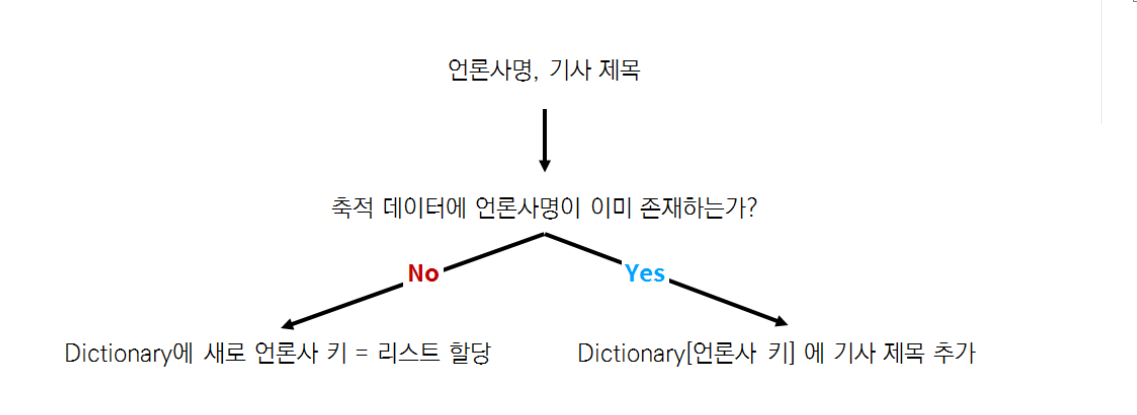

내일은 excel에 저장하는 법을 공부해 보아라

# 6주차 코드로 브라우저 조종하기

___ 

Selenium이라는 라이브러리를 사용하여 브라우저를 제어하고 데이터를 수집해봅니다. 

이번 주에 배울 방식은 실제 브라우저를 조종하여 인간이 입력하고 클릭하는 것과 똑같이 작동합니다. 코드만으로 해결하는 것보단 느리지만, 위에서 배운 한계들을 모두 뛰어 넘을 수 있습니다. 

## Stage 1- 정적 수집과 동적 수집 비교 

이번 스테이지에서는 기존에 배우던 방식인 정적 수집과 오늘 사용할 동적 수집을 비교해보고 어떤 상황에 어떤 방식을 써야하는지 배워봅시다! 

얼핏 봐서는 브라우저를 사용하는 수집이 만능이라 정적 수집을 쓸 필요가 없어보이지만 정적 수집은 속도가 매우 빠르기 떄문에 가능하면 사용하는 편이 좋습니다. 

정적 수집이 가능한 경우는 가장 처음 데이터 수집을 해보았던 네이버TV Top 100 페이지 입니다. 이 페이지의 특징은 한 페이지 안에 모든 데이터가 다 담겨있다는 것입니다. 제일 먼저 다룬만큼 가장 쉬운 형태라고 할 수 있겠습니다 .

단순한 주소의 요청값만 잘 바꿔준다면 첫 번째 형태를 여러 번 반복하는 것과 마찬가지인 경우 우리는 정적 수집이 가능하다고 말을 합니다. 

이렇게 정적 수집이 가능한 페이지의 특징은 
1. 별다른 절차 없이 주소로 바로 접속해도 데이터를 볼 수 있습니다. 

2. 새로고침하지 않으면 페이지 안의 데이터가 변하지 않습니다. (데이터가 정적입니다.) 

____

## 정적 수집을 사용할 수 없는 경우 

네이버 메일함은 바로 접속할 수 없고 반드시 로그인을 거쳐야 합니다. 

로그인 후 메일함의 주소를 복사하여 로그아웃된 상태에서 접속해 보아도 왼쪽의 로그인 안내창으로 이어집니다. 

또한 굉장히 독특한 경우로 메인페이지를 통하지 않고는 바로 접속할 수 없는 페이지 또한 존재합니다.

최근의 발달한 웹 기술을 이용하면 새로고침을 하지 않고도 데이터를 추가로 로딩할 수 있습니다. 인스타그램이 그 예시이고 스크롤이 끝까지 도달하려하면 사진을 더 불러옵니다. 이런 동적 로딩 데이터들은 최초 한 번 밖에 얻어올 수 없는 정적 수집으로는 도달이 불가능합니다. 

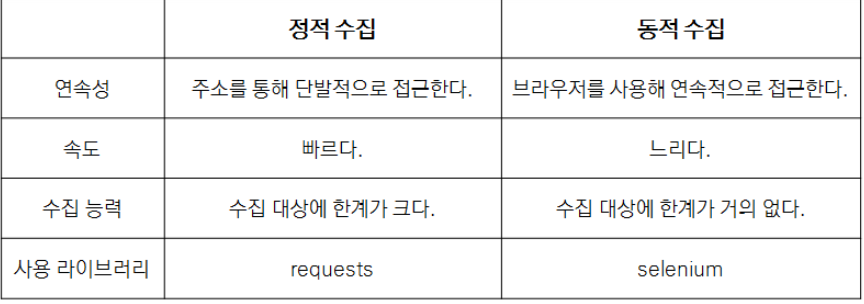

In [158]:
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys #enter key
import time

driver=webdriver.Chrome("C:/Users/sunkeun_jo/Desktop/chromedriver")

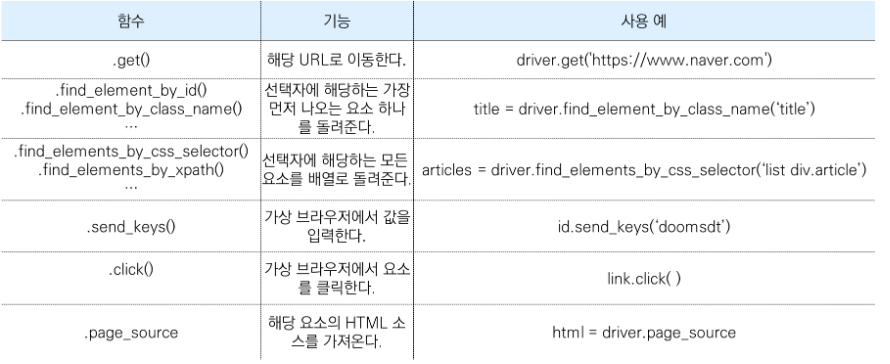

브라우저의 거의 모든 것을 실행할 수 있는 방대한 라이브러리이지만, 일단 위에 나온 함수 정도만으로 도 필요한만큼은 무리없이 사용할 수 있습니다. 

In [159]:
# get 함수

driver.get("https://map.naver.com/")
# 들어가면 바로 광고가 떠서 광고를 닫아주는 시행이 필여합니다. 
driver.find_element_by_css_selector("button.btn_close > span").click()# 클릭을 해줘서 없앰!

## find_element_by_ ~~함수 

BeautifulSoup의 select_one()에 대응하는 함수입니다. 드라이버가 위치하는 웹 페이지 내에서 해당하는 요소를 찾아 되돌려 줍니다. 

select_one()함수의 경우 매개변수로 CSS 선택자가 들어갑니다. 하지만 find_element_by~ 함수의 경우 선택의 폭이 훨씬 넓습니다.

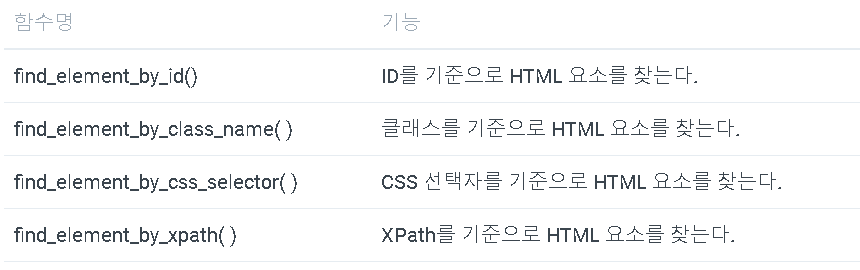

id, 클래스 등으로 선택자를 한정할 수 있습니다. 이 떄는 .이나 #이 필요 없습니다. 

즉, find_element_by_css_selector("#container")는 find_element_by_id("container")과 같은 뜻이 됩니다. 

그리고 xpath라는 처음보는 단어가 나오는데 , stage 3 에서 다룰 예정입니다. 

### find_elements_by_~~() 함수 

BeautifulSoup의 select()에 대응하는 함수이고 위와 마찬가지로 ID, 클래스, CSS선택자, XPATH등을 사용할 수 있으며 문서 내에 해당하는 모든 html 요소가 배열로 반환됩니다. 

### send_keys()함수 

beautifulSoup과 달리 selenium은 실제 브라우저와 연결되어 있기 때문에 선택된 HTML 요소와 상호작용을 할 수 있습니다. INPUT 등 텍스트를 입력할 수 있는 html 요소를 선택하고 이 send_keys() 함수를 사용하면 매개 변수로 전달된 텍스트를 input에 입력합니다.




In [160]:
driver.find_element_by_css_selector("div.input_box > input").send_keys("신촌 스터디룸")# 내가 클릭해줘야 div.input_box가 생긴다. 추후에 해결해보자

## 5. click() 함수 

말 그대로 HTML 요소를 클릭하는 함수입니다. 검색어를 입력했으니 검색 버튼을 눌러야 합니다.

In [161]:
driver.find_element_by_css_selector("div.input_box > input").send_keys(Keys.RETURN) # enter를 누르는 행위이다.

## 6. page source 

page source는 함수가 아닙니다. 단순히 driver가 위치한 웹 페이지의 소스 코드를 얻을 수 있는 기능입니다. 이는 requests 등을 사용한 정적 수집에서 최초로 획득하는 raw html 코드와 같습니다. 

In [162]:
html=driver.page_source
soup=BeautifulSouputifulSoup(html,"html.parser")

## 동적으로 데이터 수집하기 

이제 브라우저를 조종하여 네이버 지도에 접속하고 "신촌 스터디룸"이라는 키워드까지 검색해 보았으니 검색했을 때 나오는 데이터를 수집할 차례입니다. 

먼저 드라이버 변수에서 find_element_by_class(복수형 검색에 유의!)을 사용하여 모든 장소 리스트를 배열로 받아옵니다. 

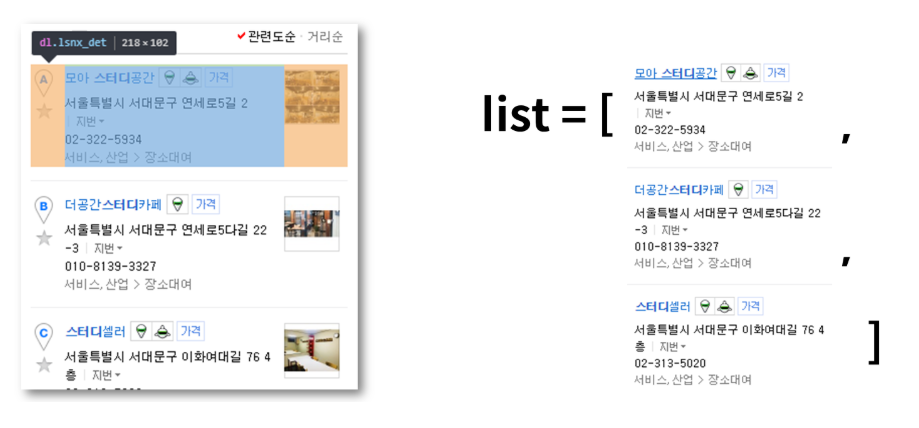

In [166]:
soup.select("div.search_box span.search_title_text")

[<span _ngcontent-bwb-c83="" class="search_title_text">꿈틀 스터디룸 신촌점</span>,
 <span _ngcontent-bwb-c83="" class="search_title_text">신촌베스트프렌드 스터디룸</span>,
 <span _ngcontent-bwb-c83="" class="search_title_text">신촌스터디룸 윙스터디</span>,
 <span _ngcontent-bwb-c83="" class="search_title_text">엘사 스터디룸</span>,
 <span _ngcontent-bwb-c83="" class="search_title_text">아이비 스터디룸</span>,
 <span _ngcontent-bwb-c83="" class="search_title_text">24시 엘스터디카페</span>,
 <span _ngcontent-bwb-c83="" class="search_title_text">플랜에이 이화스터디카페</span>,
 <span _ngcontent-bwb-c83="" class="search_title_text">영스스터디카페</span>,
 <span _ngcontent-bwb-c83="" class="search_title_text">모아 스터디공간</span>,
 <span _ngcontent-bwb-c83="" class="search_title_text">더공간스터디카페 신촌점</span>,
 <span _ngcontent-bwb-c83="" class="search_title_text">겟잡스터디카페</span>,
 <span _ngcontent-bwb-c83="" class="search_title_text">꽃다운파티룸 3호점</span>,
 <span _ngcontent-bwb-c83="" class="search_title_text">어반스칸디 파티룸</span>,
 <span _ngcontent-bwb-c83="" class="search_

In [185]:
_list=soup.select("div.search_box")
title=[]
for data in _list:
    try:
        title.append(data.select_one("span.search_title_text").text)
    except:
        continue # 그냥 나오면 무시하고 넘어간다.
title

['꿈틀 스터디룸 신촌점',
 '신촌베스트프렌드 스터디룸',
 '신촌스터디룸 윙스터디',
 '엘사 스터디룸',
 '아이비 스터디룸',
 '24시 엘스터디카페',
 '플랜에이 이화스터디카페',
 '영스스터디카페',
 '모아 스터디공간',
 '더공간스터디카페 신촌점',
 '겟잡스터디카페',
 '꽃다운파티룸 3호점',
 '어반스칸디 파티룸',
 '스터디셀러',
 '토즈 신촌본점',
 '토즈 아트레온점',
 '시간공방 신촌점',
 '주야창천',
 '소셜팩토리 신촌점',
 '코지모임공간 신촌역4호점']

In [191]:
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys #enter key
import time

driver=webdriver.Chrome("C:/Users/sunkeun_jo/Desktop/chromedriver")
# get 함수

driver.get("https://map.naver.com/")
# 들어가면 바로 광고가 떠서 광고를 닫아주는 시행이 필여합니다. 
search_box=driver.find_element_by_css_selector("button.btn_close > span").click()# 클릭을 해줘서 없앰!
time.sleep(3)
actions=webdriver.ActionChains(driver).send_keys_to_element(search_box,"신촌 스터디룸").send_keys(Keys.ENTER)# 내가 클릭해줘야 div.input_box가 생긴다. 추후에 해결해보자
actions.perform()


# 1. Xpath의 기본 사용법 

`Xpath= //태그명[@속성 = "값" ]`

속성에는 a의 href나 img의 src 등 모든 속성이 포함될 뿐만 아니라 ID와 클래스까지 해당됩니다. 

Xpath 예시

> //input[@type='password'] : type이 password인 input을 선택한다.

> //a[@href ="https://www.naver.com/"\]

> //label[@id ="message23"]

> //*[@class="article]  class가 article인 모든 태그 선택

# 2. Xpath의 고급 사용법 

ID와 클래스 외의 속성을 검색할 수 있는 것도 큰 장접이지만 xPATH는 그 이상으로 훨씬 다양한 검색 도구들을 제공합니다. 

contains()  :  속성 중 일부가 일치 a[contains(@href,"naver)] 

text() :  내부 문자열 검사 td[text()="UserID"]